<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.152282  63.164964  67.398073 -167.178545   62.536774   
      1.0    55.128700  66.514058  30.493663  257.128126  419.264546   
      2.0    57.776035  60.827440  69.627291 -197.385259    0.845508   
      3.0    39.616906  45.877523  44.916352 -154.911800  -14.501019   
      4.0    32.852253  25.285218  26.785110   20.982499  115.905081   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.310516  95.926046  82.373758 -782.661898 -531.051577   
      16.0   51.688718  28.290576  41.023706   78.914114  209.917115   
      17.0   35.981718  85.418884  39.872934   69.895504  241.169039   
      18.0   78.156784  43.537790  40.170361  -25.681786  146.183150   
      19.0   62.588775  85.839785  68.293865 -229.574729   -2.852305   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    215.867511 -153.330738  
      1.0    213.466558  205.797988  
      2.0    113.051061 -112.205553  
      3.0    120.080663 -134.581682  
      4.0    142.224020  -26.318940  
...                 ...         ...  
999.0 15.0    29.897187 -560.948765  
      16.0   294.743522  -84.826407  
      17.0   337.026462  -95.857423  
      18.0   144.709595    1.473555  
      19.0    92.533965  -95.386270  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.152282  63.164964  67.398073 -167.178545   62.536774   
      1.0    55.128700  66.514058  30.493663  257.128126  419.264546   
      2.0    57.776035  60.827440  69.627291 -197.385259    0.845508   
      3.0    39.616906  45.877523  44.916352 -154.911800  -14.501019   
      4.0    32.852253  25.285218  26.785110   20.982499  115.905081   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.310516  95.926046  82.373758 -782.661898 -531.051577   
      16.0   51.688718  28.290576  41.023706   78.914114  209.917115   
      17.0   35.981718  85.418884  39.872934   69.895504  241.169039   
      18.0   78.156784  43.537790  40.170361  -25.681786  146.183150   
      19.0   62.588775  85.839785  68.293865 -229.574729   -2.852305   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    215.867511 -153.330738  
      1.0    213.466558  205.797988  
      2.0    113.051061 -112.205553  
      3.0    120.080663 -134.581682  
      4.0    142.224020  -26.318940  
...                 ...         ...  
999.0 15.0    29.897187 -560.948765  
      16.0   294.743522  -84.826407  
      17.0   337.026462  -95.857423  
      18.0   144.709595    1.473555  
      19.0    92.533965  -95.386270  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,89.152282,63.164964,67.398073,-167.178545,62.536774,215.867511,-153.330738
1,0.0,1.0,55.128700,66.514058,30.493663,257.128126,419.264546,213.466558,205.797988
2,0.0,2.0,57.776035,60.827440,69.627291,-197.385259,0.845508,113.051061,-112.205553
3,0.0,3.0,39.616906,45.877523,44.916352,-154.911800,-14.501019,120.080663,-134.581682
4,0.0,4.0,32.852253,25.285218,26.785110,20.982499,115.905081,142.224020,-26.318940
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,63.310516,95.926046,82.373758,-782.661898,-531.051577,29.897187,-560.948765
19996,999.0,16.0,51.688718,28.290576,41.023706,78.914114,209.917115,294.743522,-84.826407
19997,999.0,17.0,35.981718,85.418884,39.872934,69.895504,241.169039,337.026462,-95.857423
19998,999.0,18.0,78.156784,43.537790,40.170361,-25.681786,146.183150,144.709595,1.473555


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e           Y  \
rep   index                                                            
0.0   0.0    89.152282  63.164964  67.398073 -167.178545   62.536774   
      1.0    55.128700  66.514058  30.493663  257.128126  419.264546   
      2.0    57.776035  60.827440  69.627291 -197.385259    0.845508   
      3.0    39.616906  45.877523  44.916352 -154.911800  -14.501019   
      4.0    32.852253  25.285218  26.785110   20.982499  115.905081   
...                ...        ...        ...         ...         ...   
999.0 15.0   63.310516  95.926046  82.373758 -782.661898 -531.051577   
      16.0   51.688718  28.290576  41.023706   78.914114  209.917115   
      17.0   35.981718  85.418884  39.872934   69.895504  241.169039   
      18.0   78.156784  43.537790  40.170361  -25.681786  146.183150   
      19.0   62.588775  85.839785  68.293865 -229.574729   -2.852305   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    215.867511 -153.330738  
      1.0    213.466558  205.797988  
      2.0    113.051061 -112.205553  
      3.0    120.080663 -134.581682  
      4.0    142.224020  -26.318940  
...                 ...         ...  
999.0 15.0    29.897187 -560.948765  
      16.0   294.743522  -84.826407  
      17.0   337.026462  -95.857423  
      18.0   144.709595    1.473555  
      19.0    92.533965  -95.386270  

[20000 rows x 7 columns]

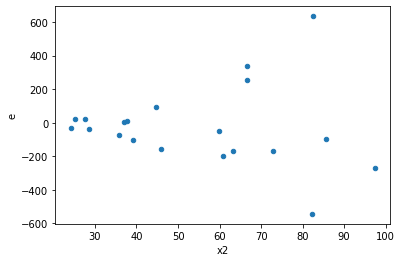

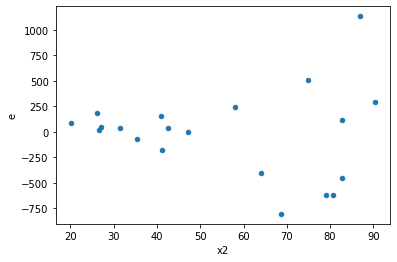

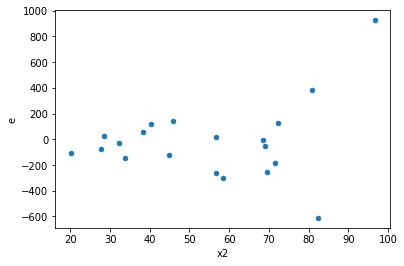

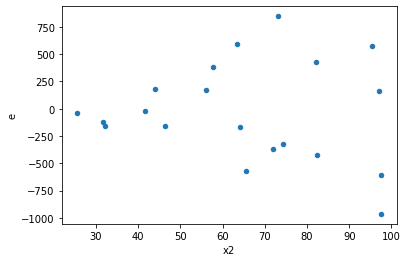

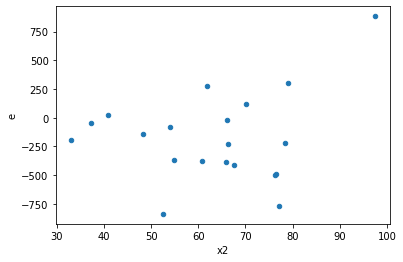

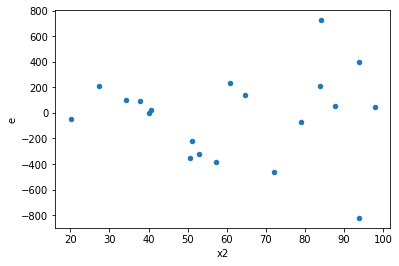

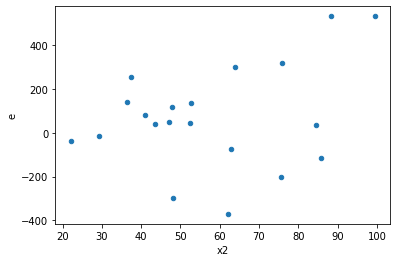

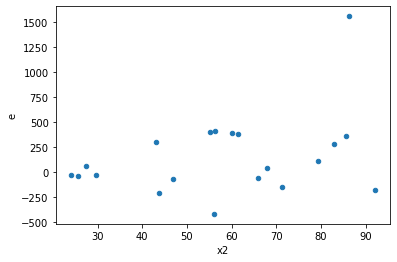

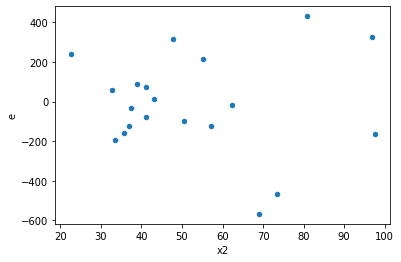

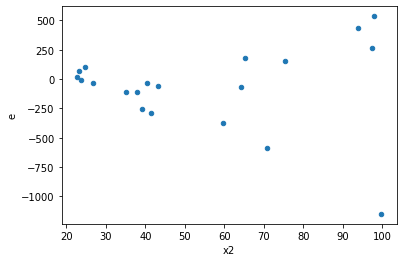

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,850215.3504115168,1224468.2575396984,121459.33577307384,174924.03679138547,1.4401860151631436,0.6423316977226685,0.6788341511386657,0.32116584886133426,Reject005=1 : Homoscedasticity
2.0,9.0,5.0,101148.67496655382,538796.6721579909,11238.741662950424,107759.33443159817,9.588202813384083,0.0227555023848367,0.9886222488075816,0.01137775119241835,Reject005=0 : Heteroscedasticity
3.0,10.0,4.0,1378080.373900842,1917593.228711915,137808.03739008418,479398.30717797874,3.4787398199495243,0.24094230091322522,0.8795288495433874,0.12047115045661261,Reject005=1 : Homoscedasticity
4.0,9.0,5.0,775565.2226183385,712250.9107057368,86173.91362425983,142450.18214114738,1.6530545747552605,0.6023413636980897,0.6988293181509552,0.30117068184904483,Reject005=1 : Homoscedasticity
6.0,9.0,5.0,315000.9750053254,187978.64791377026,35000.10833392505,37595.72958275405,1.0741603775641206,0.9915054286167202,0.5042472856916399,0.4957527143083601,Reject005=1 : Homoscedasticity
7.0,9.0,5.0,356172.7958511587,1244836.1580540342,39574.755094573185,248967.23161080683,6.291061840201944,0.05677505520460224,0.9716124723976989,0.02838752760230112,Reject005=1 : Homoscedasticity
12.0,4.0,10.0,36983.0008871419,863988.6606596436,9245.750221785474,86398.86606596436,9.344711244998312,0.004142338158398928,0.9979288309208005,0.002071169079199464,Reject005=0 : Heteroscedasticity
13.0,6.0,8.0,370444.1015200837,1710074.2365799102,61740.68358668062,213759.27957248877,3.4622110925024367,0.10876350334622575,0.9456182483268871,0.05438175167311288,Reject005=1 : Homoscedasticity
18.0,7.0,7.0,687297.8032355504,843706.1491565137,98185.40046222149,120529.44987950196,1.2275699779406382,0.7936816475047355,0.6031591762476323,0.39684082375236773,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,9.0,636027.8404080957,51664.25717939395,127205.56808161915,5740.473019932661,0.04512752945098591,0.00327675656285099,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,850215.3504115168,1224468.2575396984,121459.33577307384,174924.03679138547,1.4401860151631436,0.6423316977226685,Reject005=1 : Homoscedasticity
2.0,9.0,5.0,101148.67496655382,538796.6721579909,11238.741662950424,107759.33443159817,9.588202813384083,0.0227555023848367,Reject005=0 : Heteroscedasticity
3.0,10.0,4.0,1378080.373900842,1917593.228711915,137808.03739008418,479398.30717797874,3.4787398199495243,0.24094230091322522,Reject005=1 : Homoscedasticity
4.0,9.0,5.0,775565.2226183385,712250.9107057368,86173.91362425983,142450.18214114738,1.6530545747552605,0.6023413636980897,Reject005=1 : Homoscedasticity
5.0,5.0,9.0,471785.33657862694,165271.22137697227,94357.06731572539,18363.469041885808,0.19461678456411058,0.08621638022668013,Reject005=1 : Homoscedasticity
6.0,9.0,5.0,315000.9750053254,187978.64791377026,35000.10833392505,37595.72958275405,1.0741603775641206,0.9915054286167202,Reject005=1 : Homoscedasticity
7.0,9.0,5.0,356172.7958511587,1244836.1580540342,39574.755094573185,248967.23161080683,6.291061840201944,0.05677505520460224,Reject005=1 : Homoscedasticity
8.0,5.0,9.0,236182.30096138988,314727.93382772297,47236.46019227798,34969.77042530255,0.7403131031190027,0.7754365736047164,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      671
Reject005=0 : Heteroscedasticity    329
Name: Result_test, dtype: int64